NAME: JATIN DUTT

In [1]:
# Importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
# Fetching data
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Checking for NULL data
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

PLOTTING VARIOUS TYPES OF GRAPHS

<AxesSubplot:>

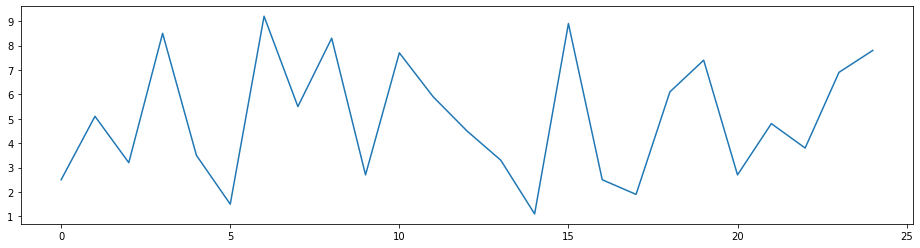

In [4]:
s_data['Hours'].plot(figsize=(16,4))

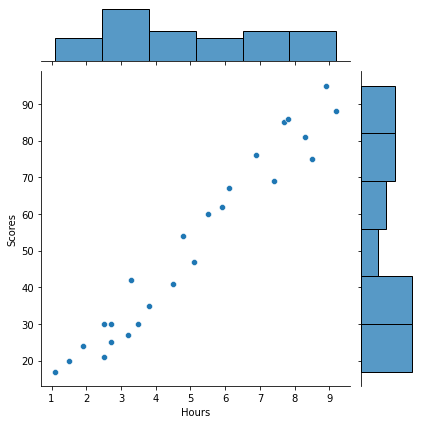

In [5]:
sns.jointplot(x='Hours',y='Scores',data=s_data,kind='scatter')

<AxesSubplot:>

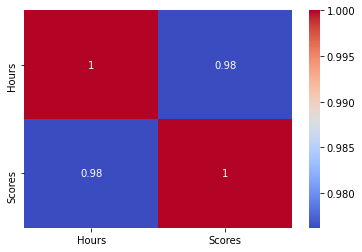

In [6]:
sns.heatmap(s_data.corr(),cmap='coolwarm',annot=True)

PREPARING DATA

In [7]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

TRAINING DATA USING LINEAR REGRESSION MODEL

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

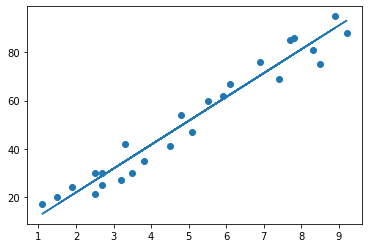

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [11]:
print(X_test)
# Predicting scores
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


PLOTTING VARIOUS GRAPHS

Text(0, 0.5, 'Predicted Y')

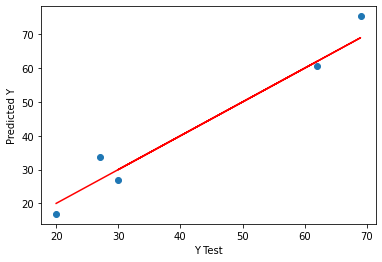

In [12]:
# Plotting the predcited values
plt.plot(y_test,y_test,'r')
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

C:\Users\Jatin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

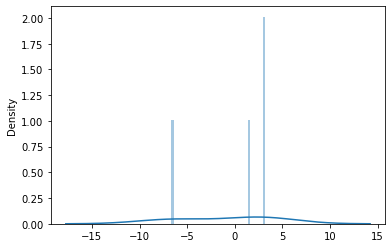

In [13]:
sns.distplot((y_test-y_pred),bins=50)

In [14]:
# Printing the predicted values
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [15]:
# Comparing the actual and the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
#predicted score if a student studies for 9.25 hrs/ day
Prediction_score = regressor.predict([[9.25]])
print("predicted score for a student studying 9.25 hours :",Prediction_score)

predicted score for a student studying 9.25 hours : [93.69173249]


In [17]:
d=[y_pred.mean(),s_data['Hours'].mean()]
d

[42.65185161206786, 5.012]

In [18]:
# Printing various metrics
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('MSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 4.183859899002975
MSE: 21.5987693072174
MSE: 4.6474476121003665
